<a href="https://colab.research.google.com/github/bineshanban/hairpinbend_collision_avoidance_yolov8/blob/main/truckdetection(img).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Install the ultralytics library
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 18.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 82.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 64.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 46.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 97.6 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling 

In [2]:
#import required libraries
import cv2
from ultralytics import YOLO
from google.colab.patches import cv2_imshow
from google.colab import files

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [4]:
#Upload Image
uploaded = files.upload()

Saving truck2.jpg to truck2.jpg


In [5]:
#Get the uploaded filename dynamically
image_path = list(uploaded.keys())[0]

In [6]:
#Load YOLOv8 Model
model = YOLO("yolov8l.pt")
#Truck Class ID for COCO Dataset
TRUCK_CLASS_ID = 7
#Read the Uploaded Image
image = cv2.imread(image_path)

100%|██████████| 83.7M/83.7M [00:00<00:00, 272MB/s]


In [7]:
    #Perform Truck Detection
    results = model(image)

    for result in results:
        for box in result.boxes:
            cls = int(box.cls[0])
            conf = float(box.conf[0])
            x1, y1, x2, y2 = map(int, box.xyxy[0])

            if cls == TRUCK_CLASS_ID and conf > 0.3:
                cv2.rectangle(image, (x1, y1), (x2, y2), (0, 0, 255), 3)
                cv2.putText(image, f"Truck {conf:.2f}", (x1, y1 - 10),
                            cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 0, 255), 2)


0: 384x640 5 persons, 1 bicycle, 1 motorcycle, 1 bus, 5 trucks, 1 chair, 56.3ms
Speed: 16.2ms preprocess, 56.3ms inference, 344.0ms postprocess per image at shape (1, 3, 384, 640)


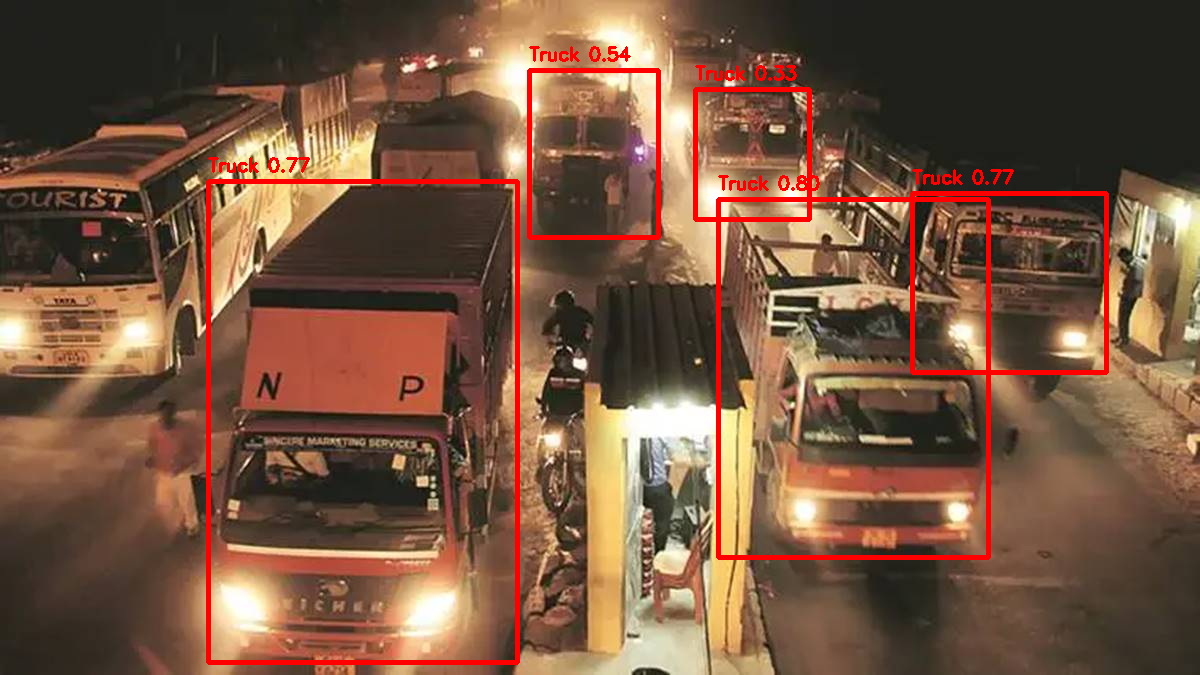

In [8]:
  #Show Image Output
  cv2_imshow(image)